## Introduction
With sports gambling becoming legal in more states, sportsbooks have experienced a significant increase in profit margins. However, alongside this growth comes the challenge of mitigating losses, particularly for bets involving spreads. A spread, also known as the points spread, is one of the most popular styles of betting among NFL fans. It is designed to create a more balanced betting field by factoring in the predicted margin of victory for a favored team.

To explain further, consider a hypothetical match between the Kansas City Chiefs and the Carolina Panthers. If the Chiefs, with an undefeated record of 7–0, are facing the Panthers, who are 2–5, sportsbooks might set the spread at -13.5 for the Chiefs. This means the Chiefs are expected to win by at least 14 points. Bettors have two main choices:
1. **Bet on the Chiefs to "cover the spread"**: The Chiefs not only need to win but must do so by 14 or more points.
2. **Bet on the Panthers**: The Panthers can win outright or lose by fewer than 14 points.

For example, if the Panthers are given a +13.5 spread, this figure is added to their final score, making it possible for them to "beat the spread" even in a close loss. This mechanism not only influences betting behaviors but also shapes public perceptions of game outcomes.

The objective of this project is to analyze the accuracy of these spread predictions by examining the relationship between the predicted spreads and the actual outcomes of games. Using the dataset titled **"NFL Scores and Betting Data"**, which spans games from 1966 to 2025, this analysis seeks to:
- Identify patterns of spread accuracy over time.
- Investigate outliers where spreads were significantly off.
- Gain a deeper understanding of how spread predictions have evolved and their implications for bettors and sportsbooks.

This exploration will not only provide insights for sports bettors like myself but will also shed light on the dynamics and methodologies behind these predictions, contributing to a broader understanding of their accuracy and evolution.

## Dataset
The dataset I will be using is titled **"NFL Scores and Betting Data"**, which spans games from 1966 to 2025 and includes 14,086 rows with 17 columns. It provides a rich source of information on historical NFL games, including team scores, spreads, weather conditions, and game settings.

### Key Columns Used in This Analysis
- **Score_home and Score_away**: These include the final scores from both the home and away teams.
- **Spread_favorite**: This is the predicted spread from the sportsbook.
- **Team_favorite_id**: Team predicted to win by the sportsbook.
- **Scheduled_date**: The date of each game.
- **Weather_temperature, Weather_wind_mph, and Weather_humidity**: These are all environmental factors that play a part in the game's possible outcome.

I will preprocess the data to handle missing values, engineer new features such as point differential and spread error, and perform exploratory data analysis to extract meaningful insights.


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [110]:
spread_data = pd.read_csv("spreadspoke_scores.csv")

In [111]:
spread_data.head()



,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


## Pre Processing 

## Value Types 

In [112]:
spread_data.dtypes


schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line         object
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity       float64
weather_detail          object
dtype: object

## Column Types

In [172]:
spread_data.columns

Index(['schedule_date', 'schedule_season', 'schedule_playoff', 'team_home',
       'score_home', 'score_away', 'team_away', 'team_favorite_id',
       'spread_favorite', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'point_differential', 'spread_error',
       'actual_point_differential', 'predicted_outcome'],
      dtype='object')

In [114]:
spread_data.shape

(14086, 17)

In [115]:
spread_data.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity
count,14086.000000,14085.00000,14085.000000,11606.000000,12550.000000,12534.000000,8498.000000
mean,1997.192390,22.51246,19.839546,-5.361020,59.004064,7.561353,67.172276
std,16.711931,10.51835,10.141933,3.429537,15.536135,5.729357,15.831903
min,1966.000000,0.00000,0.000000,-26.500000,-6.000000,0.000000,0.000000
25%,1983.000000,15.00000,13.000000,-7.000000,48.000000,1.000000,57.000000
50%,1998.000000,22.00000,20.000000,-4.500000,62.000000,8.000000,69.000000
75%,2012.000000,30.00000,27.000000,-3.000000,72.000000,11.000000,79.000000
max,2024.000000,72.00000,62.000000,0.000000,97.000000,40.000000,100.000000


In [116]:
spread_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14086 entries, 0 to 14085
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        14086 non-null  object 
 1   schedule_season      14086 non-null  int64  
 2   schedule_week        14086 non-null  object 
 3   schedule_playoff     14086 non-null  bool   
 4   team_home            14086 non-null  object 
 5   score_home           14085 non-null  float64
 6   score_away           14085 non-null  float64
 7   team_away            14086 non-null  object 
 8   team_favorite_id     11606 non-null  object 
 9   spread_favorite      11606 non-null  float64
 10  over_under_line      11596 non-null  object 
 11  stadium              14086 non-null  object 
 12  stadium_neutral      14086 non-null  bool   
 13  weather_temperature  12550 non-null  float64
 14  weather_wind_mph     12534 non-null  float64
 15  weather_humidity     8498 non-null  

In [160]:
spread_data.isnull().sum()
spread_data.duplicated().sum()
spread_data = spread_data.drop_duplicates()



In [118]:
(spread_data.isnull().sum() / len(spread_data)) * 100



schedule_date           0.000000
schedule_season         0.000000
schedule_week           0.000000
schedule_playoff        0.000000
team_home               0.000000
score_home              0.007099
score_away              0.007099
team_away               0.000000
team_favorite_id       17.606134
spread_favorite        17.606134
over_under_line        17.677126
stadium                 0.000000
stadium_neutral         0.000000
weather_temperature    10.904444
weather_wind_mph       11.018032
weather_humidity       39.670595
weather_detail         77.623172
dtype: float64

### Drops rows with missing values in 'score_away' and Drosp rows with missing values in 'score_away'

In [119]:

spread_data['score_away'] = spread_data['score_away'].fillna(spread_data['score_away'].mean())

spread_data['spread_favorite'] = spread_data['spread_favorite'].fillna(spread_data['spread_favorite'].mean())


### Point Differential : Calculates the difference between the home and away scores and Spread Error: Calculates -how far off the spread prediction was from the actual point differential.

In [170]:

spread_data['point_differential'] = spread_data['score_home'] - spread_data['score_away']


spread_data['spread_error'] = spread_data['spread_favorite'] - spread_data['point_differential']


In [121]:
spread_data.drop(columns=['schedule_week', 'stadium', 'stadium_neutral', 'weather_detail', 'over_under_line'], inplace=True)


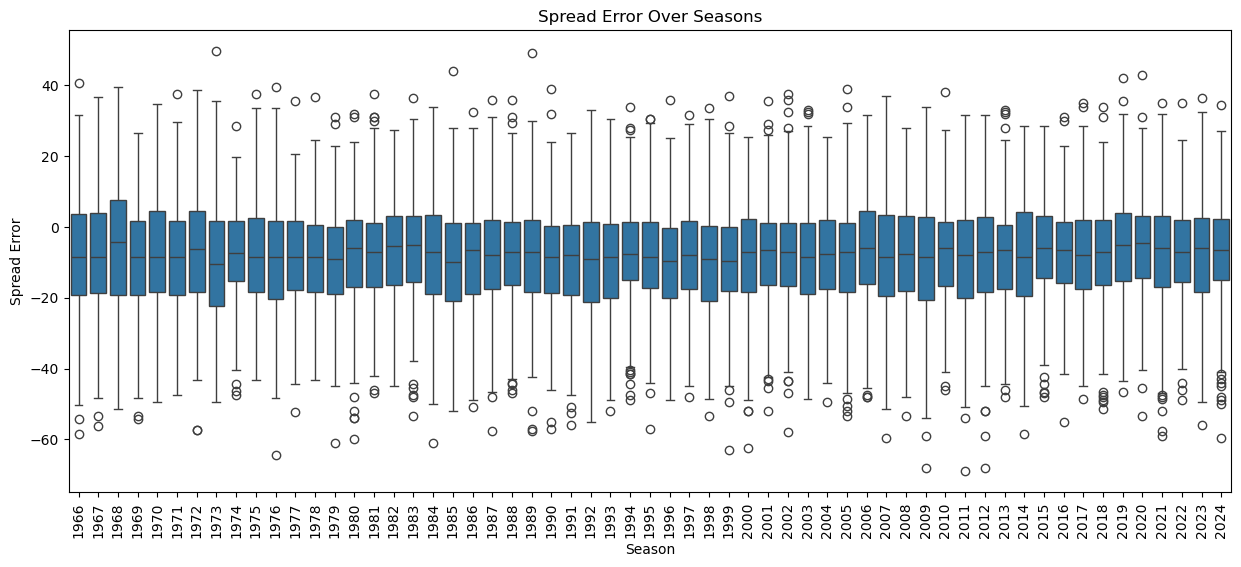

In [122]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='schedule_season', y='spread_error', data=spread_data)
plt.title('Spread Error Over Seasons')
plt.xlabel('Season')
plt.ylabel('Spread Error')
plt.xticks(rotation=90)
plt.show()


### Spread Error Over Seasons

This boxplot visualizes the distribution of spread prediction errors across NFL seasons from 1966 to 2024. Each box represents the interquartile range (IQR) of errors for a season, with the median line indicating the typical error. The whiskers and outliers highlight the variability and extreme cases in the spread predictions, helping to identify trends or anomalies over time.


In [123]:
data_2024 = spread_data[spread_data['schedule_season'] == 2024]
no_cover_rate = (data_2024['spread_error'] < 0).mean()
print(f"Percentage of games where teams did not cover the spread in 2024: {no_cover_rate * 100:.2f}%")



Percentage of games where teams did not cover the spread in 2024: 65.96%


In [131]:
iqr_per_season = spread_data.groupby('schedule_season')['spread_error'].quantile(0.75) - spread_data.groupby('schedule_season')['spread_error'].quantile(0.25)
largest_iqr_season = iqr_per_season.idxmax()
print(f"largest is: {largest_iqr_season}")
print(f"Largest IQR value: {iqr_per_season[largest_iqr_season]}")


largest is: 1968
Largest IQR value: 27.0


## Interquartile Range (IQR) Analysis by Season
This code above calculates the interquartile range (IQR) of spread prediction errors for each NFL season and identifies the season with the largest IQR. The result highlights 1968 as the season with the most variability in spread errors, with an IQR value of 27.0, suggesting a significant inconsistency in predictions for that year.



## Insights from Spread Error Analysis

### Spread Error Over Seasons
The boxplot visualizes the spread error distribution across all NFL seasons from 1966 to 2024. Notable observations include:
- In **2024**, 65.96% of games resulted in teams failing to cover the spread. This indicates that sportsbooks may have overestimated or underestimated teams' performances more frequently than usual in this season.
- Spread errors in 2024 show tighter variability compared to other seasons, suggesting that spreads were generally more accurate this past NFL season.



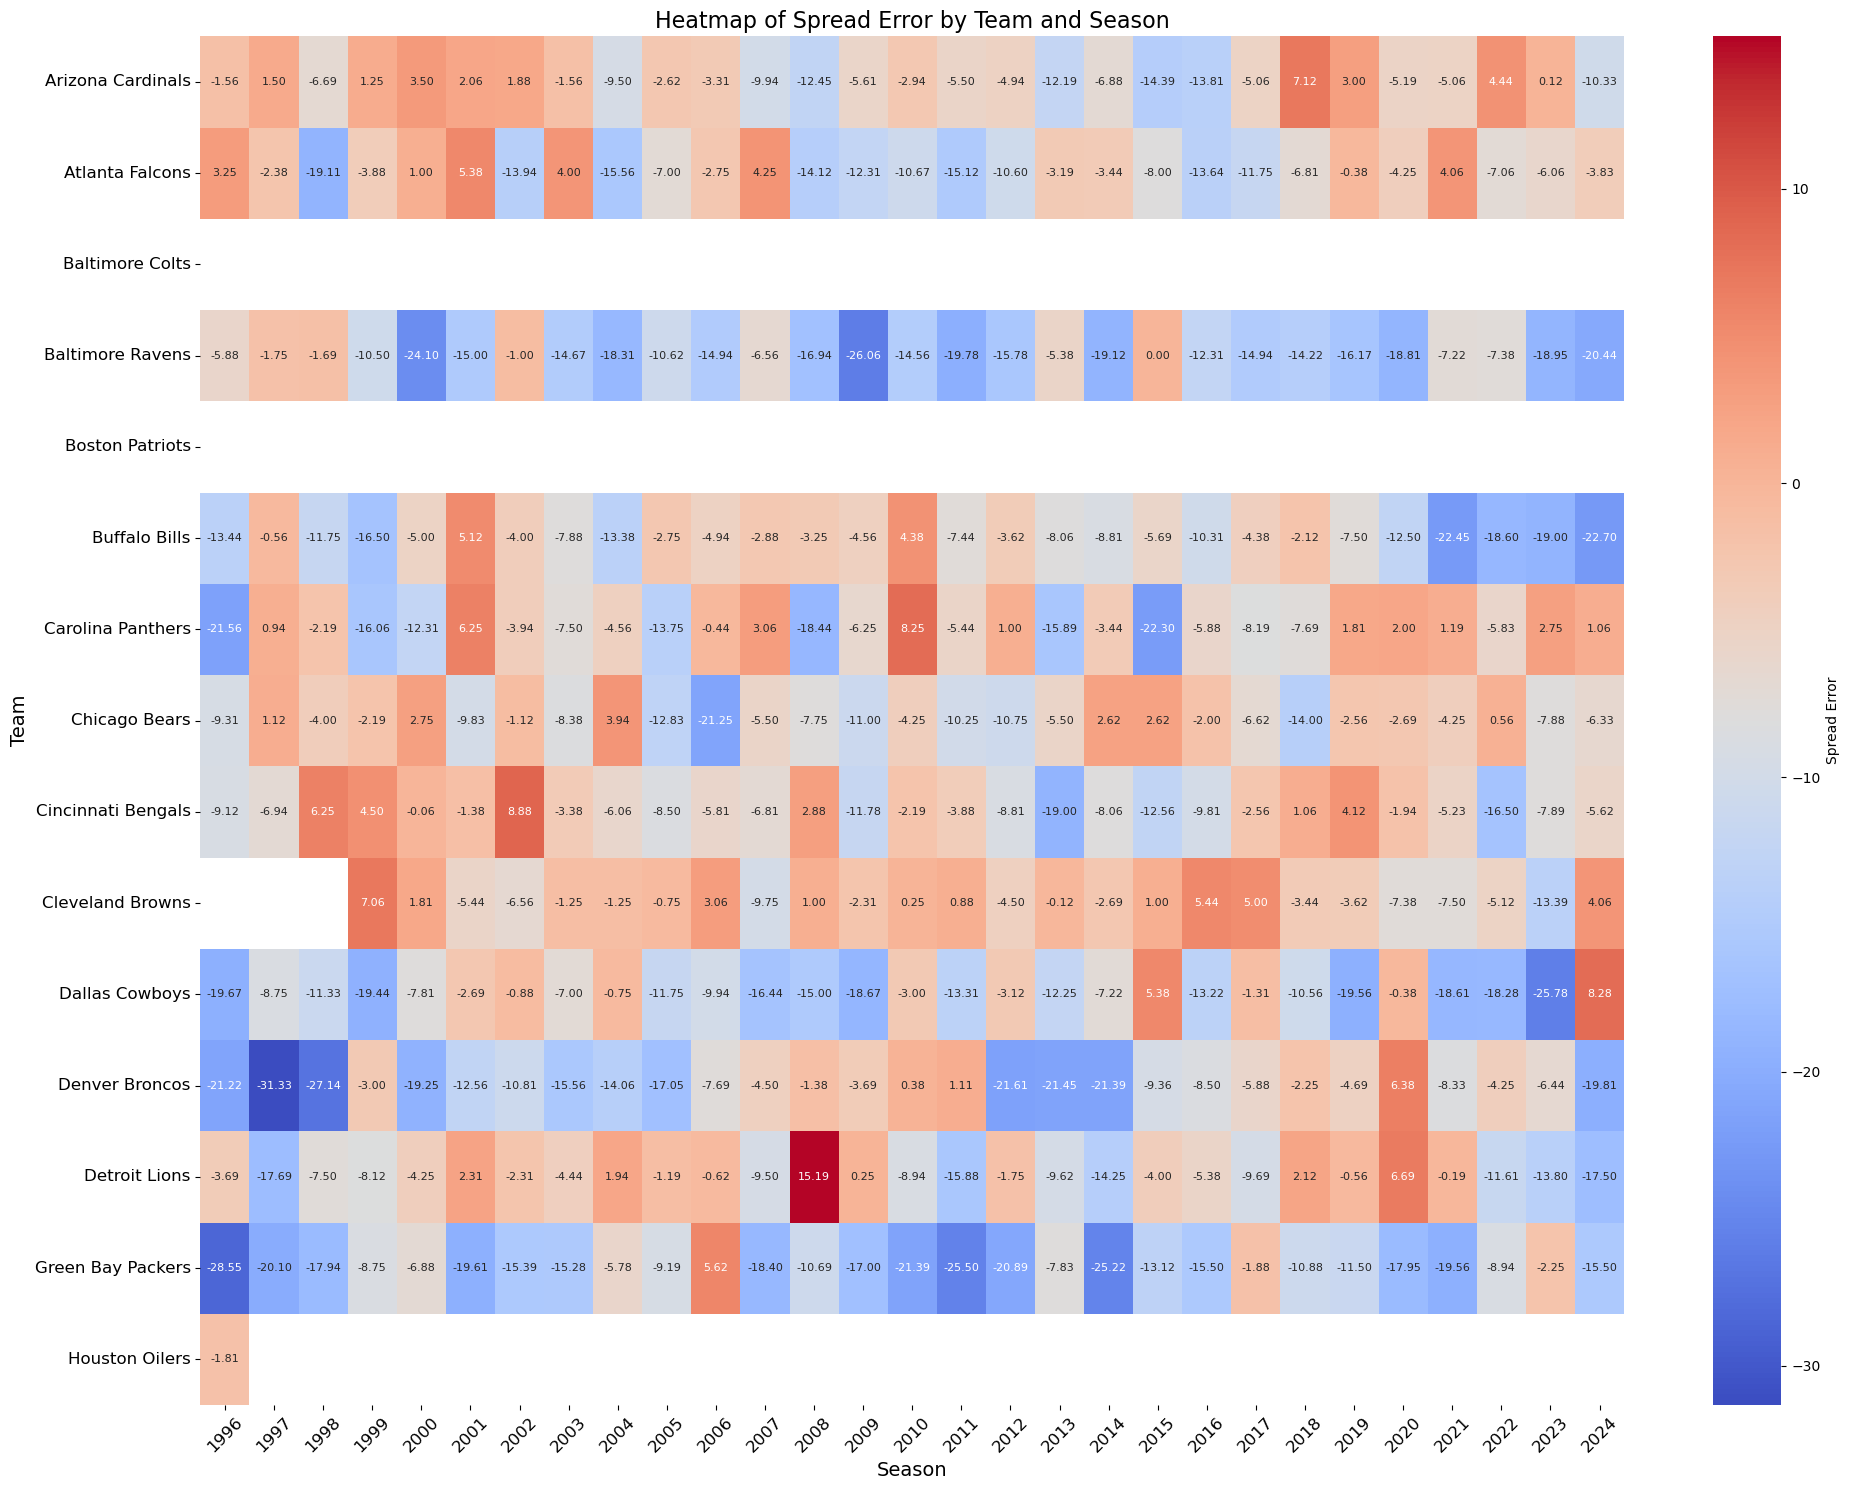

In [177]:
plt.figure(figsize=(20, 15))  # Adjust figure size
sns.heatmap(
    heatmap_data.iloc[:15, 30:],  # Subset of teams and seasons
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar_kws={'label': 'Spread Error'}, 
    annot_kws={"size": 8}  # Adjust annotation font size
)
plt.title("Heatmap of Spread Error by Team and Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Team", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Heatmap of Spread Error by Team and Season (Subset)
This heatmap shows the spread prediction errors for a subset of teams and seasons. It provides a focused view of how certain teams' spread errors vary over time, allowing for easier comparison and identification of patterns or anomalies.


In [134]:
# Filter numeric columns
numeric_data = spread_data.select_dtypes(include=['number'])

# Calculate correlations
correlations = numeric_data.corr()

# Display the correlation matrix
print(correlations)

                     schedule_season  score_home  score_away  spread_favorite  \
schedule_season             1.000000    0.080242    0.110378        -0.005366   
score_home                  0.080242    1.000000   -0.034243        -0.128916   
score_away                  0.110378   -0.034243    1.000000         0.105391   
spread_favorite            -0.005366   -0.128916    0.105391         1.000000   
weather_temperature         0.195492    0.007519    0.078840         0.058824   
weather_wind_mph           -0.351517   -0.075852   -0.129294        -0.030398   
weather_humidity           -0.106214   -0.015777   -0.026512        -0.003349   
point_differential         -0.018542    0.731232   -0.706768        -0.163187   
spread_error                0.016516   -0.718956    0.691086         0.353383   

                     weather_temperature  weather_wind_mph  weather_humidity  \
schedule_season                 0.195492         -0.351517         -0.106214   
score_home                   

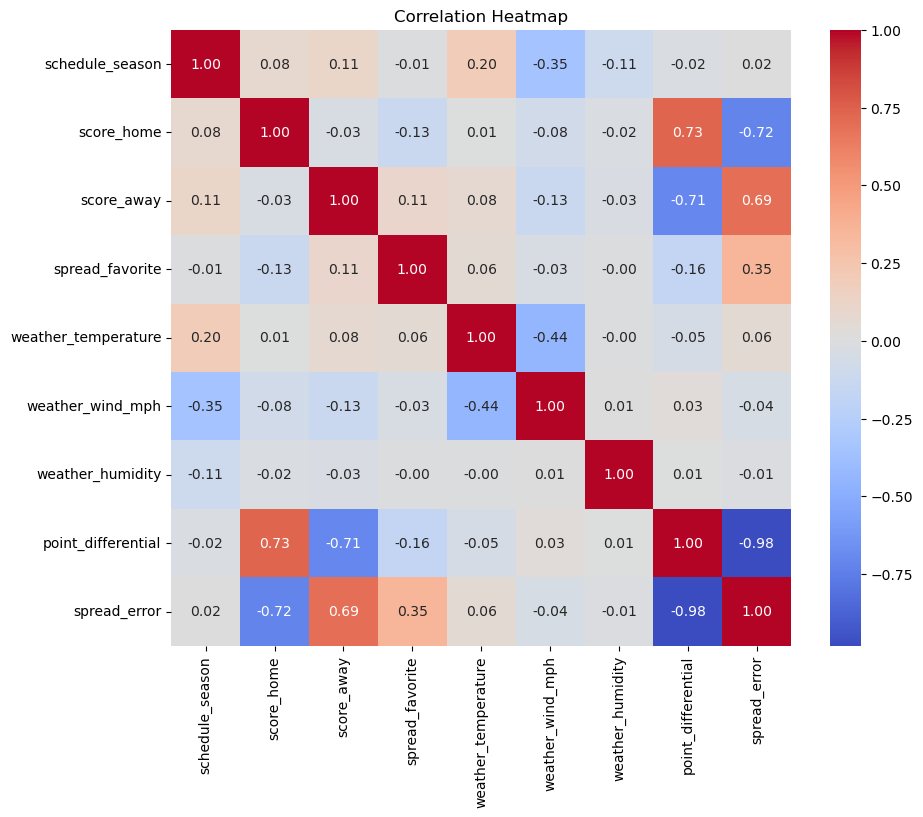

In [135]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Correlation Matrix of Numeric Variables

This section calculates and displays the correlation matrix for all numeric variables in the dataset. The correlation values range from -1 to 1, where:

- A value close to 1 indicates a strong positive correlation.
- A value close to -1 indicates a strong negative correlation.
- A value near 0 suggests little to no correlation.

Key Observations:
- **Spread Error and Point Differential**: A strong negative correlation (-0.98) indicates that as the point differential increases, the spread error decreases significantly.
- **Score Home and Score Away**: A moderately negative correlation (-0.71) reflects the inverse relationship between home and away scores.
- **Weather Wind MPH and Weather Temperature**: A negative correlation (-0.44) suggests that higher wind speeds are generally associated with lower temperatures.

This analysis helps identify relationships between variables, which can guide further exploration and model development.


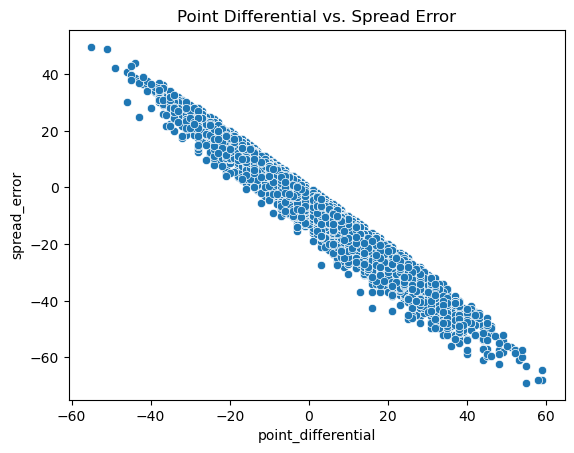

In [136]:
sns.scatterplot(data=spread_data, x='point_differential', y='spread_error')
plt.title("Point Differential vs. Spread Error")
plt.show()

### Scatterplot: Point Differential vs. Spread Error

This scatterplot visualizes the relationship between point differential and spread error. The strong negative linear trend demonstrates that as the point differential increases, the spread error tends to decrease. This aligns with the earlier correlation analysis, which showed a strong negative correlation (-0.98) between these two variables.

### Data Cleaning

To ensure data quality:
- Checked for missing values (`NaN`) in the `point_differential` and `spread_error` columns and removed rows with missing values.
- Verified that no infinite values (`inf`) exist in these columns and removed any rows containing them.

These cleaning steps were essential to maintaining the integrity of the analysis and ensuring accurate visualization and modeling.


In [137]:
print(spread_data[['point_differential', 'spread_error']].isnull().sum())  
print(np.isinf(spread_data[['point_differential', 'spread_error']]).sum())

spread_data = spread_data.dropna(subset=['point_differential', 'spread_error'])
spread_data = spread_data[~np.isinf(spread_data['point_differential'])]
spread_data = spread_data[~np.isinf(spread_data['spread_error'])]

point_differential    1
spread_error          1
dtype: int64
point_differential    0
spread_error          0
dtype: int64


### Linear Regression: Point Differential vs. Spread Error

This section fits a linear regression model to analyze the relationship between `point_differential` (independent variable) and `spread_error` (dependent variable).

**Model Details**:
- **Slope**: -1.03  
  This indicates that for every 1-point increase in point differential, the spread error decreases by approximately 1.03 points.
- **Intercept**: -5.27  
  When the point differential is 0, the predicted spread error is approximately -5.27 points.

The negative slope reflects the strong inverse relationship observed in the scatterplot and correlation analysis. This model helps quantify the impact of point differential on spread error.


In [138]:
import numpy as np

X = spread_data[['point_differential']]
y = spread_data['spread_error']

model = LinearRegression()
model.fit(X, y)
print(f"Slope: {model.coef_[0]}, Intercept: {model.intercept_}")

Slope: -1.034188526586923, Intercept: -5.269637155315355


In [139]:
X = spread_data[['point_differential']].values.reshape(-1, 1)
y = spread_data['spread_error'].values

In [140]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print(f"Slope: {model.coef_[0]}, Intercept: {model.intercept_}")

Slope: -1.034188526586923, Intercept: -5.269637155315355


### Scatterplot with Regression Line: Point Differential vs. Spread Error

This scatterplot shows the relationship between `point_differential` and `spread_error`, with a fitted regression line overlayed. The regression line, represented in red, highlights the strong negative linear relationship between the two variables. 

Key Details:
- **Data Points**: Represent individual observations of point differential and corresponding spread error.
- **Regression Line**: Indicates the predicted values of `spread_error` based on the linear regression model.

This visualization confirms the model's performance and supports the observed inverse correlation between the variables.


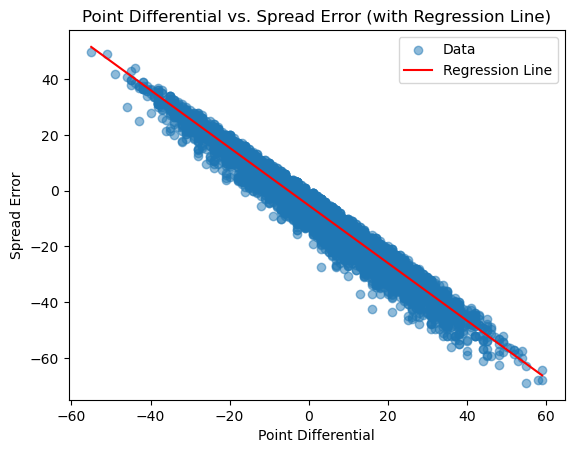

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.scatter(X, y, label="Data", alpha=0.5)

# Regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)
plt.plot(x_range, y_pred, color="red", label="Regression Line")

# Customize plot
plt.title("Point Differential vs. Spread Error (with Regression Line)")
plt.xlabel("Point Differential")
plt.ylabel("Spread Error")
plt.legend()
plt.show()

In [142]:
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

R-squared: 0.9615887587404136


### R-squared and Residual Analysis

**R-squared Value**: The R-squared value for the linear regression model is approximately 0.962, indicating that 96.2% of the variability in `spread_error` can be explained by `point_differential`. This high value suggests a strong fit for the model.

**Residual Plot**:
- The residual plot shows the difference between the actual and predicted `spread_error` values across the `point_differential`.
- The red horizontal line at zero represents perfect prediction (no residual).
- Observations:
  - Most residuals are clustered around zero, further confirming the model's strong performance.
  - There may be slight patterns or outliers that could indicate areas for further investigation or potential limitations in the model.

This analysis highlights both the strengths and potential areas of refinement for the linear regression model.


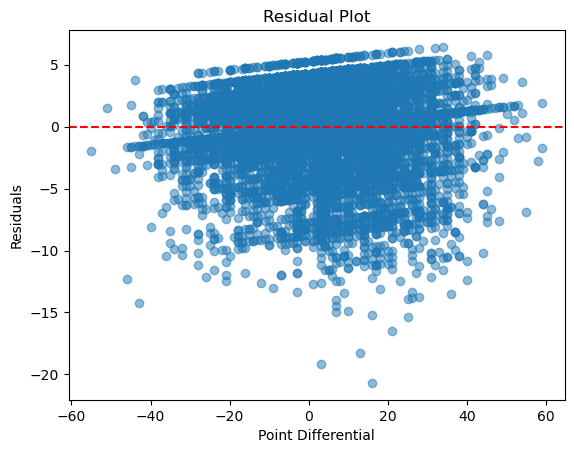

In [143]:
residuals = y - model.predict(X)
plt.scatter(X, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("Point Differential")
plt.ylabel("Residuals")
plt.show()

### Model Evaluation and Predictions

**Train-Test Split**:
- The dataset was split into training (80%) and testing (20%) sets to evaluate the model's performance on unseen data.
- The test R-squared value is approximately 0.962, indicating that the model generalizes well to new data.

**Predictions on New Data**:
- Using the trained model, predictions were made for example point differentials `[10, 20, -10]`, yielding corresponding predicted spread errors of `[-15.62, -25.98, 5.08]`.
- These predictions demonstrate the model's ability to estimate spread errors based on new input values.

**Additional Analysis**:
- Calculated new columns:
  - `actual_point_differential`: The difference between home and away scores.
  - `spread_error`: The difference between actual point differential and spread favorite.

This section confirms the model's reliability and provides tools for predicting spread errors for new inputs.


In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
print(f"Test R-squared: {model.score(X_test, y_test)}")

Test R-squared: 0.9619117444652358


In [145]:
new_data = np.array([[10], [20], [-10]])  # Example point differentials
predictions = model.predict(new_data)
print(f"Predicted Spread Errors: {predictions}")

Predicted Spread Errors: [-15.62424732 -25.97969857   5.08665517]


In [146]:
spread_data["actual_point_differential"] = spread_data["score_home"] - spread_data["score_away"]


In [147]:
spread_data["spread_error"] = spread_data["actual_point_differential"] - spread_data["spread_favorite"]


### Conclusion

This analysis demonstrates a strong inverse relationship between `point_differential` and `spread_error`, with a high R-squared value of 0.962. The linear regression model effectively predicts spread errors based on point differential, offering valuable insights for bettors and sportsbooks.

While the model performs well, some limitations remain. Outliers and unexplored factors, such as team-specific trends or game context, may impact predictions. Future work could incorporate additional variables like weather conditions or player performance to enhance the model's accuracy.

Overall, this project highlights the utility of data-driven approaches in understanding and predicting spread outcomes in NFL games.
